# Introduction

This tutorial will introduce you to the use of Bokeh, which is a common interactive data visualization library for python users. Data visualization has been useful in analyzing and interpreting data, which enables the audiences to understand the data in the way of communicating with statistical graphics and plots. Under many circumstances we want to explore the patterns or relationships between variables in the data, which can be easily achieved by plotting various types of charts. With the help of Bokeh, we can quickly illustrate complicated graphs though few lines of command. It provides three major visualization interfaces to the users -- charts, plotting and models -- to allow flexible and powerful functions to the maximum extent, and in this tutorial, we are mainly going to experiment the plotting interface.

## Installing the Libraries

Before getting started, we need to first set up the library on our computers. It is best obtained via Anaconda Python Distribution by running following command if you are an Anaconda user:

    conda install bokeh

Or you can obtain the package by running command below, only when you have made sure that all the dependencies needed are already installed(NumPy, Jinja2, Six, Requests, Tornado >= 4.0, PyYaml and DateUtil):

    pip install bokeh

## Basic Plotting

Now that we have installed the library, we can import it, define the data, set the output mode, create and visualize the chart. Note that Bokeh provides three output modes (web browser, jupyter notebook and server) to provide more interactivity. When using the plotting API, we need to first import "figure" that allows us to create a plot object to draw on, and then "output_files"／"output_notebook"／"output_server" that defines the output mode, and finally "show" to present the plot.

In [1]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

Below is a simple example of scatter plot using plotting. 

In [2]:
p = figure(plot_width=400, plot_height=400, title = "plot example -- scatter")
p.circle(x=[1, 2, 3, 4], y=[1, 2, 3, 4], size = 10, color = "green", alpha = 0.8)
show(p)

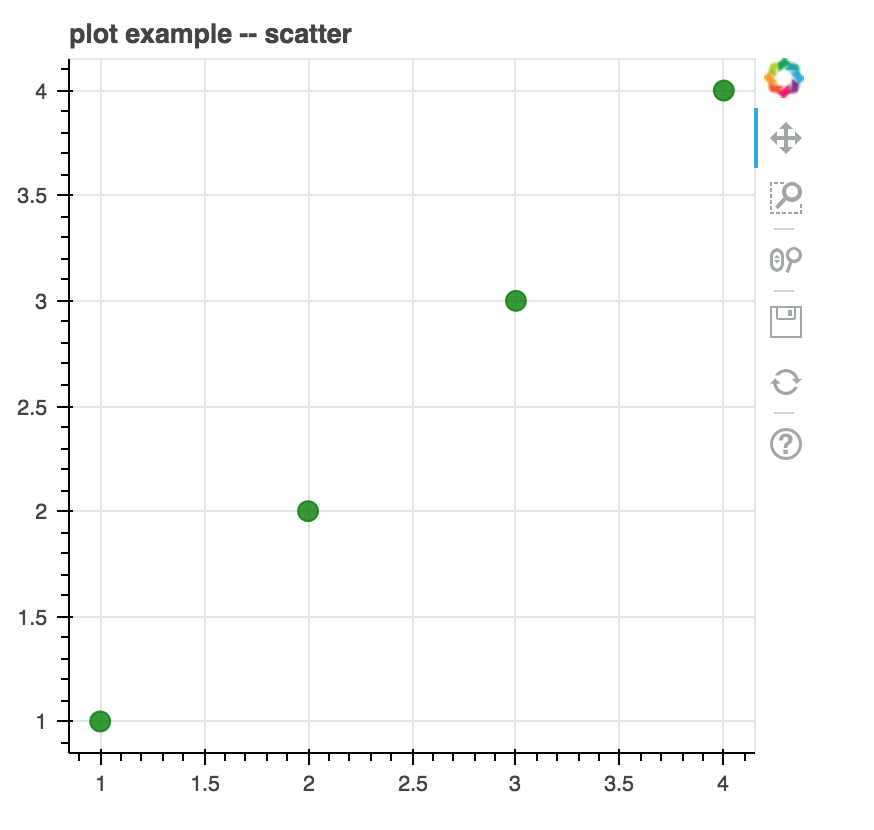

In the circle() funtion, we have to set the data points and can change the properties of the points such as size, color, transparancy(alpha). These properties can be defined as either fixed or vector values. If the plot above is not screenshot but the actual output generated by Bokeh, by clicking on the little icons next to it, we can actually interact with it by performing operations such as pan, zoom, reset, wheel zoom, save and so on. To substitute circle points for the square ones, we can simply call square() function instead of circle() function. 

Apart from scatter plots, we can also make line plots with bokeh by replacing the circle() function above with line() function and change the parameter of size into line_width to control the "size". Combining multiple glyphs is also an option and any number of glyphs can be added on to one single plot as shown below.

In [3]:
p = figure(plot_width=400, plot_height=400, title = "plot example -- multiple glyphs")
p.line(x=[1, 2, 3, 4], y=[1, 2, 3, 4])
p.circle(x=[1, 2, 3, 4], y=[1, 2, 3, 4], size = 6)
p.asterisk(x=[2, 3, 4, 5], y=[1, 2, 3, 4], size = 8, color = ['red','green','indigo','orange'])
p.square(x=[1, 2, 3, 4], y=[4, 3, 1, 0.5], size = 9)
show(p)

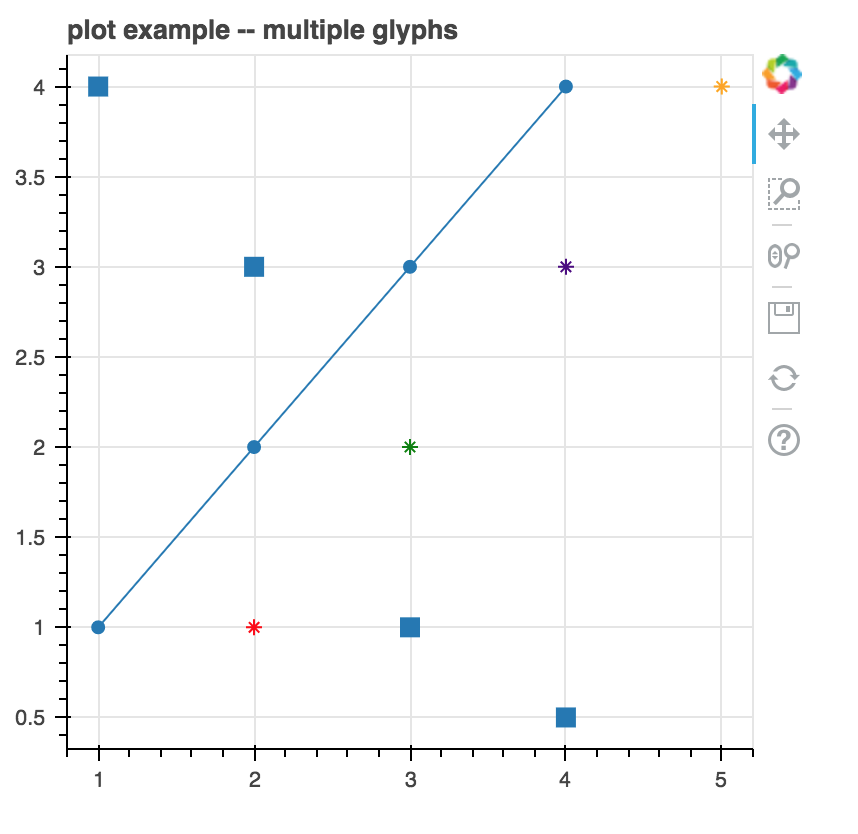

As for handling categorical data, we can instead use bar charts by calling hbar() or vbar() functions of Bokeh. Suppose we are using vbar() method to make vertical bar, we first need to inform bokeh that the x axis is categorical by setting x_range to a list of categorical values, and then set the bar height using "top" parameter ("right" for hbar() method). Like plotting lines and circles, we also have the options to define other properties such as width, fill_color, line_color and etc.

In [4]:
snacks = ['Potato Chips', 'Candies', 'Chocolate Bar', 'Onion Rings']
p = figure(x_range=snacks, plot_height=350, title="Snack Counts",
           toolbar_location=None, tools="")
p.vbar(x=snacks, top=[3,6,7,8], width=0.9, line_color = "navy", fill_color = "blue")
p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)

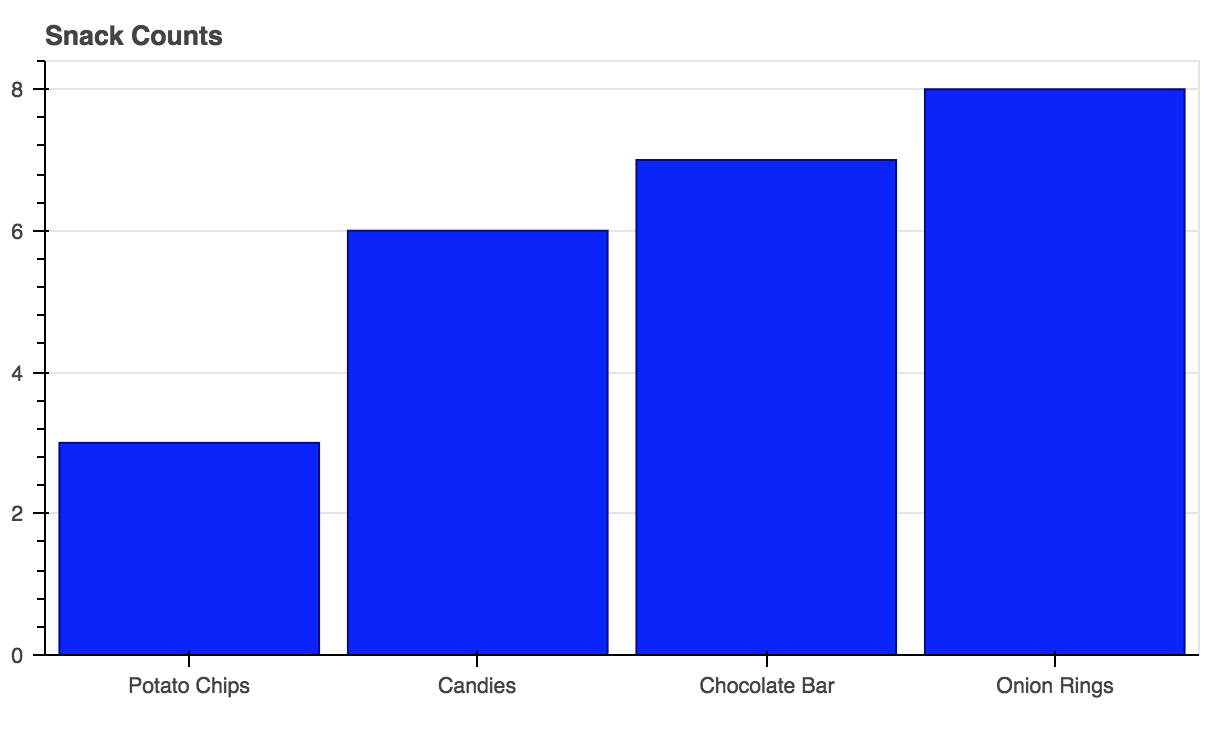

To customize the axis parameter, we can set the range of x and y by defining x_range and y_range and determine the type of axis by defining x_axis_type and y_axis_type. We can even add multiple axises with different ranges to a single plot, which is particularly helpful when making a plot consisting of multiple graphics.

In [5]:
from bokeh.models import LinearAxis, Range1d
p = figure(x_range=(1, 4), y_range=(1,4), title = "plot example -- axis")
x = [1,2,3,4]
p.line(x, y=[1, 2, 3, 4], color="orange")
#set the second y range
p.extra_y_ranges = {"yname": Range1d(start=0, end=20)}
p.line(x, y = [i**2 for i in x], color="firebrick", y_range_name="yname")
#add second y range to axis
p.add_layout(LinearAxis(y_range_name="yname"), 'left')
show(p)

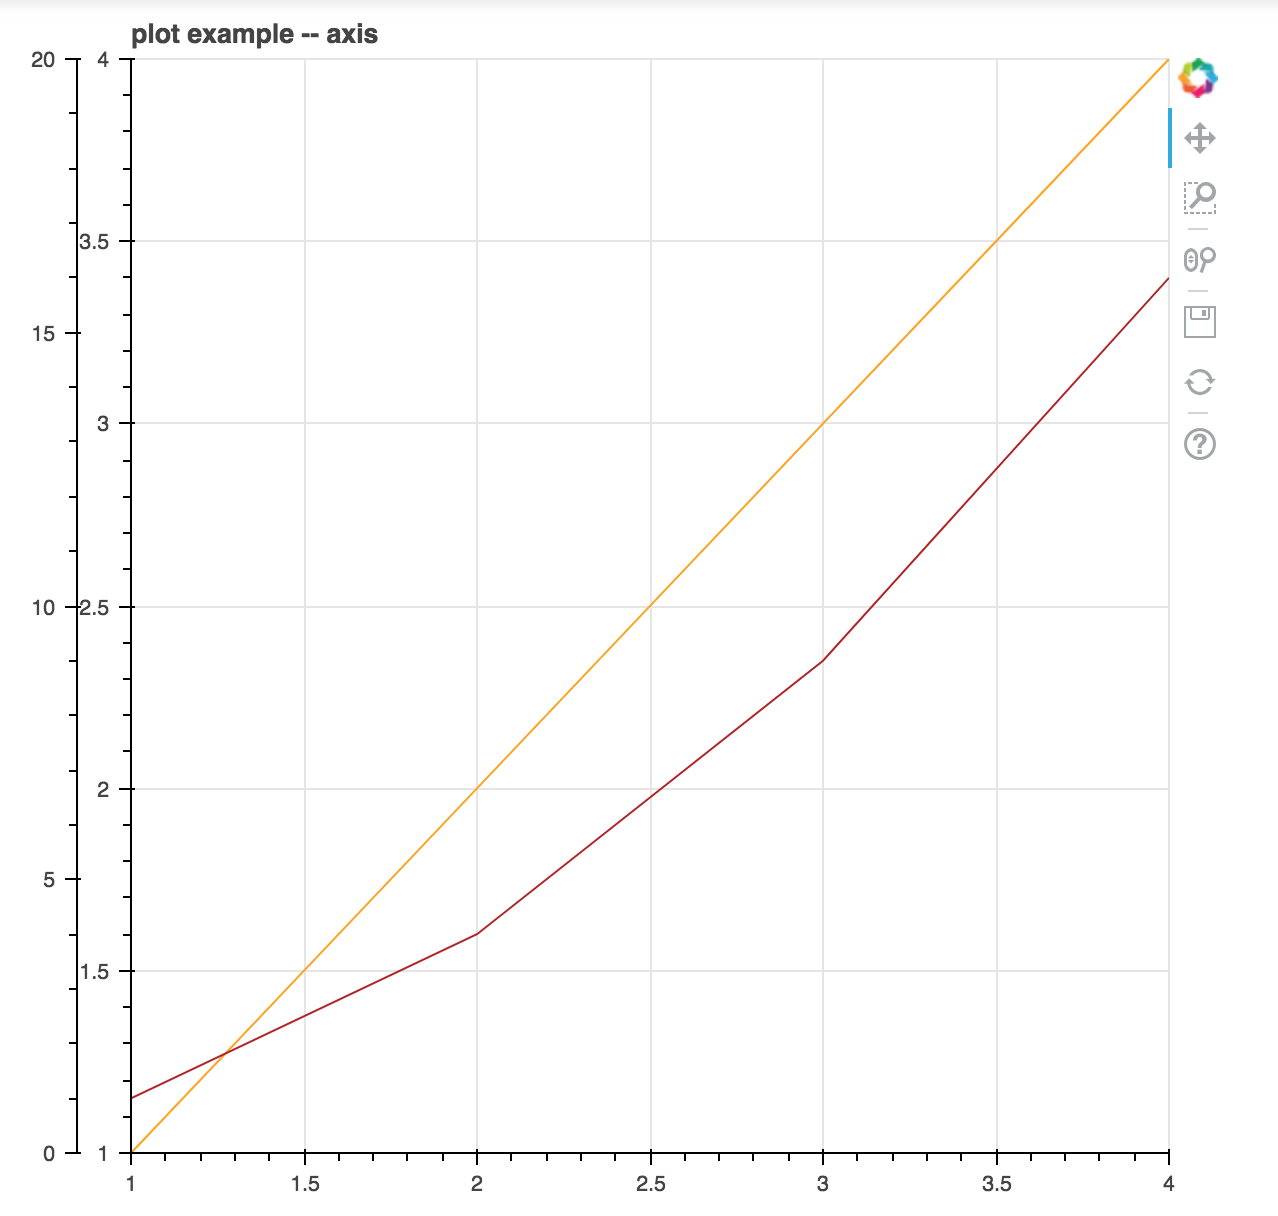

## Providing Data for Plots

There are several types of data that Bokeh accepts, and in this section, we are mainly using ColumnDataSources by passing in data values directly. Simplest to say, ColumnDataSource is a mapping between column names and lists of data. It has a data parameter of type dictionary in default, with string column names being the keys and data vector values being the values, but we can also pass in Pandas dataframe or groupby object.

Now that we have learned some basic functions and data type to make plots, we can begin using these methods to explore real-world dataset. Before diving into visualizaing the data, we should get a sense of what the data looks like. We will be using Chicage Crime Data from https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2 and each row in it corresponds to a crime in the area of Chicago and has informtion about it. To download the data, we just need to click on the export icon located at the top left and then hit CSV button. As the data is larger than 1G, we need to be patient until it is ready to use.

We first read in the data and take a look at the dataframe along with its complete column name list:

In [6]:
import pandas as pd
crimes = pd.read_csv("Crimes_-_2001_to_present.csv")
crimes = crimes.loc[crimes['Year'] > 2012]
print(crimes.columns.values)
crimes.head()

['ID' 'Case Number' 'Date' 'Block' 'IUCR' 'Primary Type' 'Description'
 'Location Description' 'Arrest' 'Domestic' 'Beat' 'District' 'Ward'
 'Community Area' 'FBI Code' 'X Coordinate' 'Y Coordinate' 'Year'
 'Updated On' 'Latitude' 'Longitude' 'Location'
 'Historical Wards 2003-2015' 'Zip Codes' 'Community Areas' 'Census Tracts'
 'Wards' 'Boundaries - ZIP Codes' 'Police Districts' 'Police Beats']


ID Case Number                    Date                      Block  \
0  11262176    JB193744  03/20/2018 11:45:00 PM  079XX S SOUTH CHICAGO AVE   
1  11263193    JB193759  03/20/2018 11:45:00 PM        103XX S CRANDON AVE   
2  11262168    JB193757  03/20/2018 11:43:00 PM        049XX W CHICAGO AVE   
3  11262204    JB193741  03/20/2018 11:43:00 PM        032XX W FULTON BLVD   
4  11262387    JB194046  03/20/2018 11:42:00 PM          106XX S HOXIE AVE   

   IUCR       Primary Type                    Description  \
0  0560            ASSAULT                         SIMPLE   
1  0430            BATTERY  AGGRAVATED: OTHER DANG WEAPON   
2  1360  CRIMINAL TRESPASS                     TO VEHICLE   
3  0486            BATTERY        DOMESTIC BATTERY SIMPLE   
4  1320    CRIMINAL DAMAGE                     TO VEHICLE   

  Location Description  Arrest  Domestic      ...       Longitude  \
0           RESTAURANT    True     False      ...      -87.585055   
1            RESIDENCE   False     False      ...      -87.566922   
2                ALLEY    True     False      ...      -87.749119   
3            APARTMENT   False      True      ...      -87.707493   
4               STREET   False     False      ...      -87.560797   

                        Location  Historical Wards 2003-2015  Zip Codes  \
0   (41.751100797, -87.58505475)                         9.0    21202.0   
1  (41.707643133, -87.566921717)                        47.0    21202.0   
2  (41.894976841, -87.749119184)                         4.0     4299.0   
3  (41.886401307, -87.707492907)                        11.0    21572.0   
4  (41.701937844, -87.560797155)                        47.0    21202.0   

  Community Areas  Census Tracts  Wards  Boundaries - ZIP Codes  \
0            41.0          431.0   35.0                    25.0   
1            48.0          174.0   37.0                    25.0   
2            26.0          585.0   45.0                    32.0   
3            28.0          176.0   23.0                    30.0   
4            48.0          174.0   47.0                    25.0   

  Police Districts  Police Beats  
0             19.0         224.0  
1             19.0         255.0  
2             25.0          69.0  
3             16.0          86.0  
4             19.0         255.0  

[5 rows x 30 columns]

We are only considering the data from year 2013 to year 2018, as we should care more about recent data. Since we understand the structure of the data now, we can go ahead and start making plots. For the first plot, we can make a basic bar chart to illustrate how many crimes there are for each year.

In [7]:
crimes.Year = crimes.Year.astype(str)

group = crimes.groupby("Year").size()
year = group.index.tolist()
crime_range = (0,group.max() + 2000)

p = figure(plot_height=350, x_range=year, y_range = crime_range, 
           title = "Distribution of Crimes from 2013 to 2018")

p.vbar(x=year, top=group, width=1, line_color="white", 
        fill_color="orange")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "years"
p.yaxis.axis_label = "nunmber of crimes"
p.y_range.start = 0


show(p)

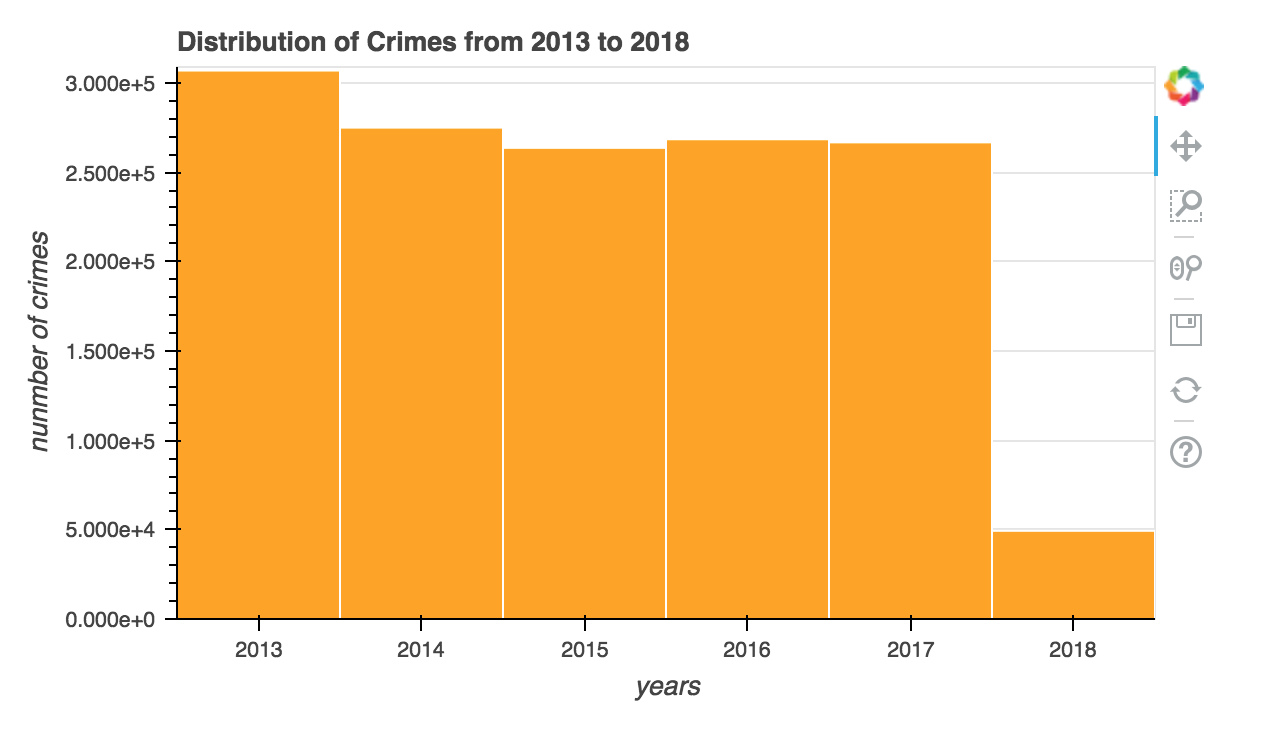

To further explore the relationship between number of crimes and time, we can make use of the combination of line graphs and bar charts to describe the distribution of crimes among each month for a certain year and also the mean of number of crimes each quarter. Before plotting, we need to precess the data so it can be directly mapped to the x values, that is, month and quarter in this case. To do a quick demonstration, we select the crime data in 2015 specifically, transform the data type of "Date" column values into Datetime object, extract the month, and calculate total number of crimes by month using groupby() function in Pandas. Below is a plot using the technique of combining multiple glyphs:

In [8]:
#process data
crimes_2015 = crimes.loc[crimes['Year'] == '2015']
crimes_datetime = pd.to_datetime(crimes_2015['Date'])
crimes_2015 = crimes_2015.assign(datetime = crimes_datetime)
crimes_2015 = crimes_2015.assign(month = crimes_datetime.dt.month)
group = crimes_2015.groupby("month").size()

In [9]:
from bokeh.models import (
    FactorRange,PanTool, BoxZoomTool, LassoSelectTool, ResetTool
)

factors = [
    ("Q1", "Jan"), ("Q1", "Feb"), ("Q1", "Mar"),
    ("Q2", "Apr"), ("Q2", "May"), ("Q2", "Jun"),
    ("Q3", "Jul"), ("Q3", "Aug"), ("Q3", "Sep"),
    ("Q4", "Oct"), ("Q4", "Nov"), ("Q4", "Dec"),

]

p = figure(x_range=FactorRange(*factors), plot_height=350,toolbar_location="above", 
           tools=[BoxZoomTool(), ResetTool(), PanTool(), LassoSelectTool()], 
           title = "Distribution of Crimes Each Month for Year 2015")


p.vbar(x=factors, top=group, width=0.9, alpha=0.5, fill_color="indigo", line_color=None)

#obtain mean of number of crimes each quarter
i = 0
s = 0
m = []
for total in group:
    s += total
    i += 1
    if i % 3 == 0:
        i = 0
        m.append(int(s/3))
        s = 0
    
p.line(x=["Q1", "Q2", "Q3", "Q4"], y=m, color="red", line_width=2)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None


show(p)

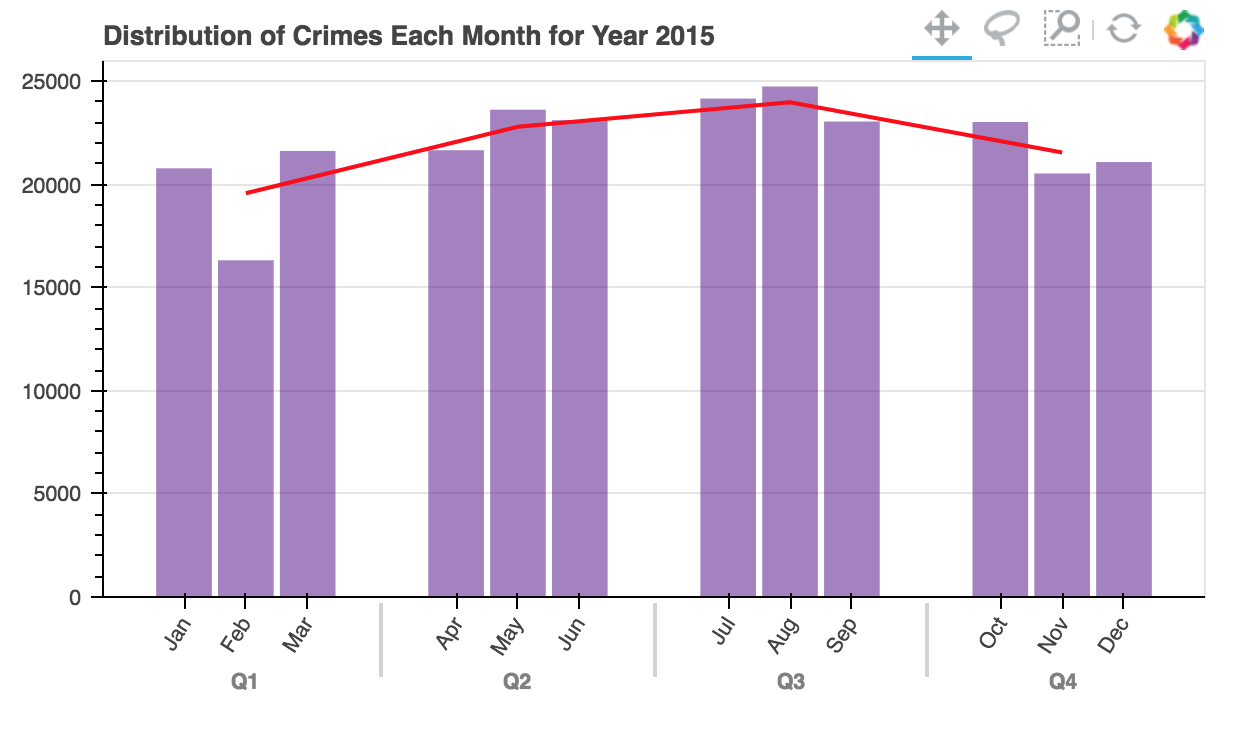

Scatter plot provides us the opportunity to compare columns of data, and we can use it to compare occurrences of crimes during time of days. As the data itself is too large to be loaded into Bokeh in notebook, we are only taking data of 2018 into consideration. This time, we are feeding extracted weekday(Monday to Sunday) and time information into ColumnDataSource.

In [10]:
crimes_2018 = crimes.loc[crimes['Year'] == '2018']
crimes_datetime = pd.to_datetime(crimes_2018['Date'])
crimes_2018 = crimes_2018.assign(datetime = crimes_datetime)
crimes_2018 = crimes_2018.assign(day = crimes_datetime.dt.strftime('%a'))
crimes_2018 = crimes_2018.assign(time = crimes_datetime.dt.time)
crimes_2018_new = crimes_2018[['datetime','day','time']]
crimes_2018_new.set_index('datetime', inplace = True)

Here, we are introducing a new function named jitter, which is used to avoid visually overlapping by assigning adjustable small gaps between each categories and to ensure that we make most out of the plot.

In [11]:
from bokeh.transform import jitter
from bokeh.models import ColumnDataSource

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

source = ColumnDataSource(crimes_2018_new)

p = figure(plot_width=900, plot_height=500, y_range=weekday, x_axis_type='datetime', 
           title="Crimes by Time of Day in 2018")

p.circle(x='time', y=jitter('day', width=0.4, range=p.y_range),  source=source, alpha=0.3)

p.xaxis[0].formatter.days = ['%Hh']
p.x_range.range_padding = 0
p.ygrid.grid_line_color = None


show(p)

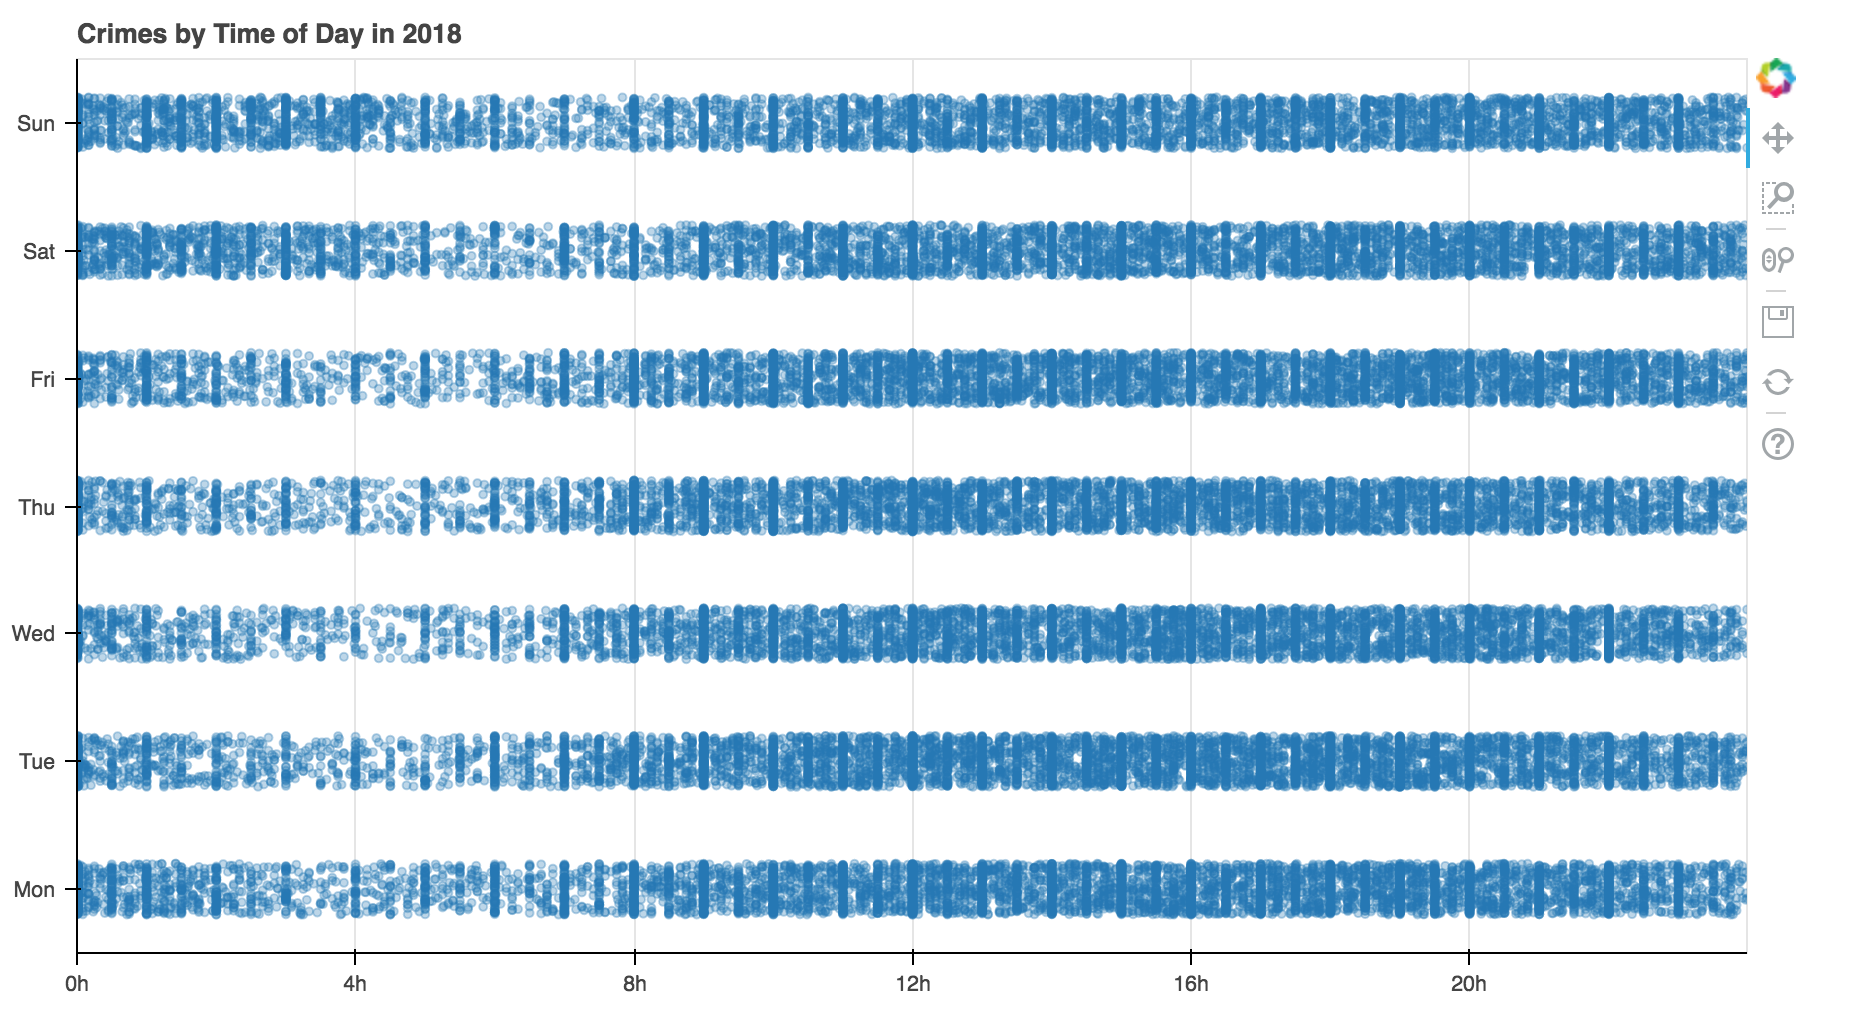

With Bokeh, we can also combine the scatter plots with geomap to visualize the relationship between the occurences of crime and the location. One thing to note about using Google Maps is that, we are required to obtain an API key via url(https://developers.google.com/maps/documentation/javascript/get-api-key).

In [12]:
from bokeh.models import (
  GMapPlot, GMapOptions, Circle, PanTool, WheelZoomTool, LassoSelectTool, ResetTool
)

map_options = GMapOptions(lat=41.85, lng=-87.73, map_type="roadmap", zoom=11)

p = GMapPlot(x_range=Range1d(), y_range=Range1d(), map_options=map_options)
p.title.text = "Chicago"

# Replace the value below with your personal API key:
p.api_key = "Your Personal Google Api Key Here"

crimes_2018_new = crimes_2018[['Latitude','Longitude']]
source = ColumnDataSource(crimes_2018_new)

circle = Circle(x="Longitude", y="Latitude", fill_color="#C13232", fill_alpha=0.3, line_color=None)
p.add_glyph(source, circle)

#customize tool bar
p.add_tools(PanTool(), WheelZoomTool(), LassoSelectTool(), ResetTool())


show(p)

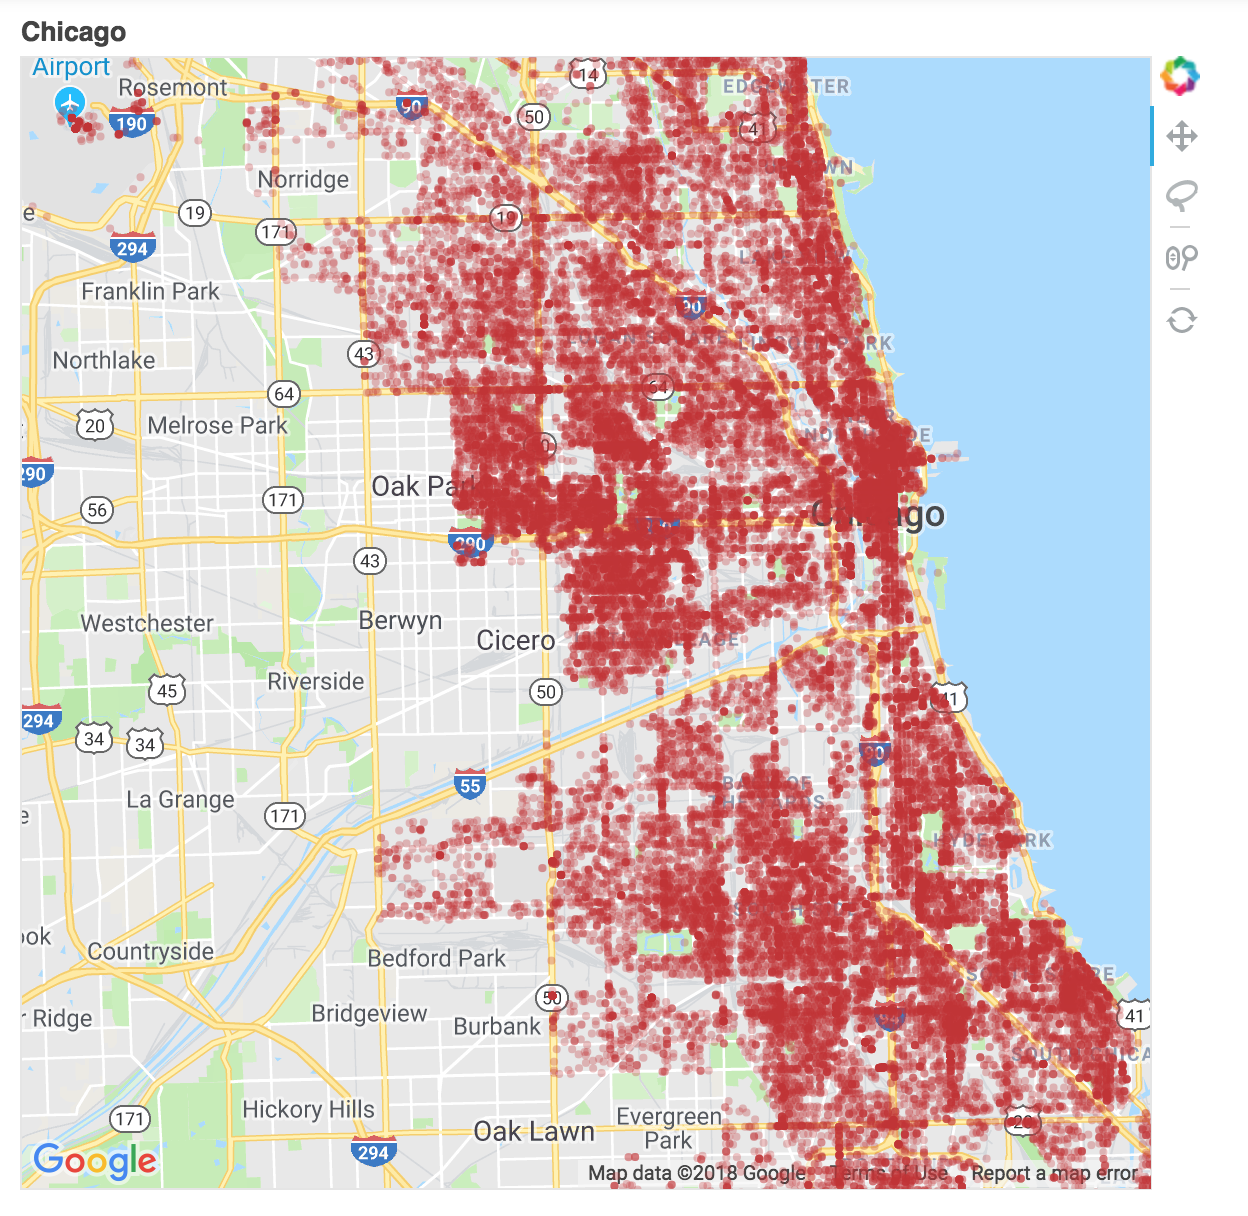

## Summary and References:
This tutorial just highlighted a few functionality that Bokeh interface provides. For reference and more information, please see links below.

1.Bokeh Library Official Guide: http://bokeh.pydata.org/en/latest/

2.Chicago Crime Dataset: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2